In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")
#hallo
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data = []
for file in os.listdir('Data'):
        with open('Data/'+file, mode='r') as tf:
            datain = np.genfromtxt(tf,delimiter="\t",skip_header=15).T
            data.append([file.split('.')[0],datain[0],datain[1],np.sqrt(datain[1].clip(min=1))])


In [3]:
anh = Path("Results/anhang.txt")
anh.touch()
nf = open(anh,"w")

dir = Path("Results/amplitudes.txt")
dir.touch()
countrate = open(dir,"w")
countrate.write("pressure\tg1_amplitude\tg1_amplitudeerr\tg2_amplitude\tg2_amplitudeerr\tg3_amplitude\tg3_amplitudeerr\tg4_amplitude\tg4_amplitudeerr\n")

dir2 = Path("Results/center.txt")
dir2.touch()
center = open(dir2,"w")
center.write("pressure\tg1_center\tg1_centererr\tg2_center\tg2_centererr\tg3_center\tg3_centererr\tg4_center\tg4_centererr\n")

101

#########################################################055_Torr
[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 121
    # data points      = 750
    # variables        = 9
    chi-square         = 1410.48886
    reduced chi-square = 1.90349374
    Akaike info crit   = 491.713822
    Bayesian info crit = 533.294480
[[Variables]]
    g1_amplitude:  36610.8199 +/- 758.589616 (2.07%) (init = 1)
    g1_center:     206.175260 +/- 2.06150831 (1.00%) (init = 200)
    g1_sigma:      76.1990142 +/- 1.32146044 (1.73%) (init = 0.3)
    g2_amplitude:  35731.8216 +/- 988.542387 (2.77%) (init = 1)
    g2_center:     364.081471 +/- 0.93717192 (0.26%) (init = 350)
    g2_sigma:      48.3734394 +/- 1.06600669 (2.20%) (init = 0.3)
    g3_amplitude:  25973.7279 +/- 456.999795 (1.76%) (init = 1)
    g3_center:     519.559145 +/- 1.36519363 (0.26%) (init = 520)
    g

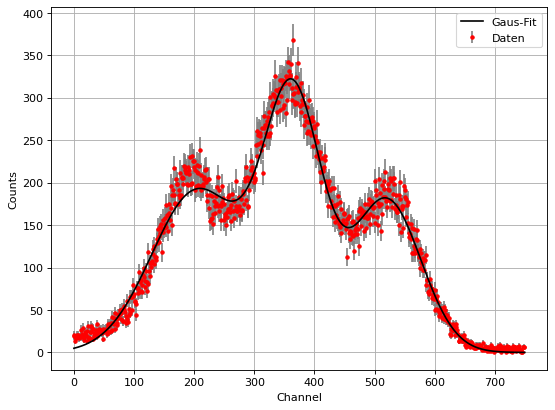

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 550
    # variables        = 3
    chi-square         = 1419.42626
    reduced chi-square = 2.59492919
    Akaike info crit   = 527.449363
    Bayesian info crit = 540.379118
[[Variables]]
    amplitude:  23905.4504 +/- 249.167198 (1.04%) (init = 34626)
    center:     1043.93000 +/- 0.60135890 (0.06%) (init = 1047.937)
    sigma:      57.0593861 +/- 0.45793661 (0.80%) (init = 58)
    fwhm:       134.364584 +/- 1.07835829 (0.80%) == '2.3548200*sigma'
    height:     167.139817 +/- 2.19274573 (1.31%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.120


<Figure size 432x288 with 0 Axes>

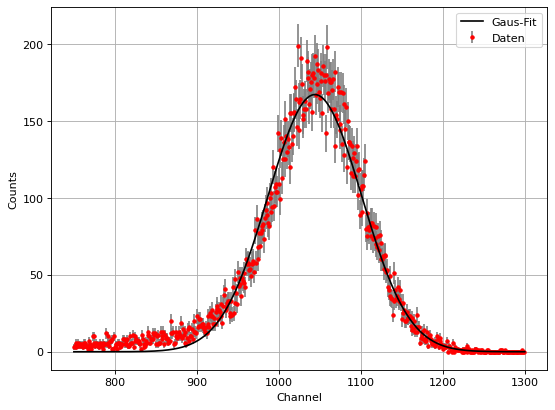

#########################################################075_Torr
[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 224
    # data points      = 500
    # variables        = 9
    chi-square         = 636.048656
    reduced chi-square = 1.29541478
    Akaike info crit   = 138.333482
    Bayesian info crit = 176.264955
[[Variables]]
    g1_amplitude:  27014.9925 +/- 661.362233 (2.45%) (init = 1)
    g1_center:     55.6844433 +/- 0.92654098 (1.66%) (init = 75)
    g1_sigma:      44.9719772 +/- 1.15196586 (2.56%) (init = 0.3)
    g2_amplitude:  45710.1373 +/- 820.603450 (1.80%) (init = 1)
    g2_center:     199.394759 +/- 0.67590155 (0.34%) (init = 200)
    g2_sigma:      50.2159726 +/- 1.00766331 (2.01%) (init = 0.3)
    g3_amplitude:  23716.5692 +/- 403.728350 (1.70%) (init = 1)
    g3_center:     344.856990 +/- 0.97186902 (0.28%) (init = 350)
    g3

<Figure size 432x288 with 0 Axes>

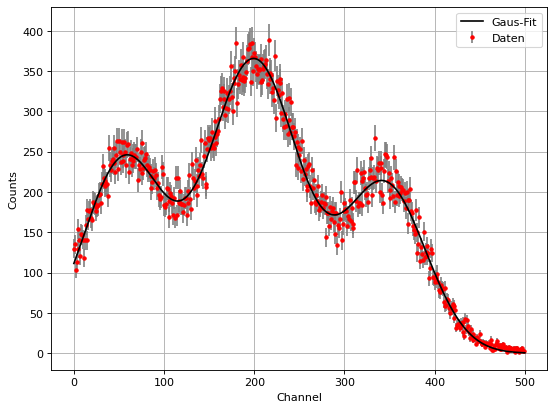

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 350
    # variables        = 3
    chi-square         = 518.542750
    reduced chi-square = 1.49435951
    Akaike info crit   = 143.581262
    Bayesian info crit = 155.155061
[[Variables]]
    amplitude:  23826.6222 +/- 188.910506 (0.79%) (init = 34425)
    center:     796.162122 +/- 0.39873204 (0.05%) (init = 797.4592)
    sigma:      49.4268000 +/- 0.30575021 (0.62%) (init = 51)
    fwhm:       116.391217 +/- 0.71998671 (0.62%) == '2.3548200*sigma'
    height:     192.313633 +/- 1.91888545 (1.00%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.121


<Figure size 432x288 with 0 Axes>

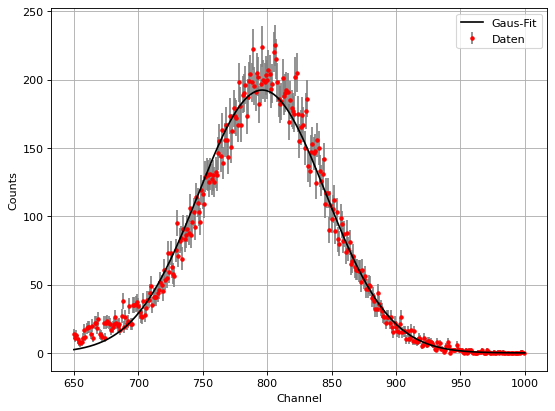

#########################################################100_Torr
[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 152
    # data points      = 600
    # variables        = 9
    chi-square         = 735.081647
    reduced chi-square = 1.24379297
    Akaike info crit   = 139.831153
    Bayesian info crit = 179.403520
[[Variables]]
    g1_amplitude:  28277.9008 +/- 959.025596 (3.39%) (init = 1)
    g1_center:     49.0875328 +/- 1.16292495 (2.37%) (init = 75)
    g1_sigma:      55.5932615 +/- 2.05255208 (3.69%) (init = 0.3)
    g2_amplitude:  44509.6583 +/- 908.259321 (2.04%) (init = 1)
    g2_center:     215.256752 +/- 0.85133568 (0.40%) (init = 200)
    g2_sigma:      55.5451628 +/- 1.16629036 (2.10%) (init = 0.3)
    g3_amplitude:  24348.1987 +/- 400.755549 (1.65%) (init = 1)
    g3_center:     380.476527 +/- 1.13499764 (0.30%) (init = 350)
    g3

<Figure size 432x288 with 0 Axes>

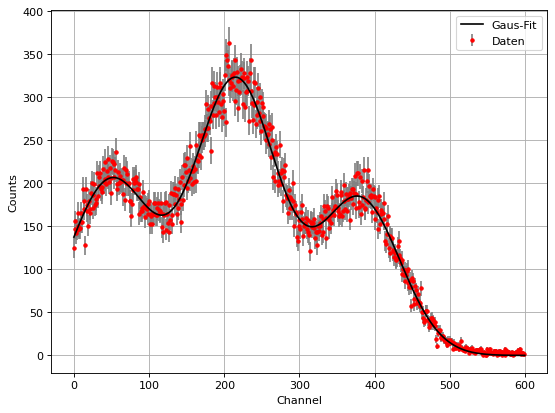

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 500
    # variables        = 3
    chi-square         = 1153.78637
    reduced chi-square = 2.32150175
    Akaike info crit   = 424.098105
    Bayesian info crit = 436.741929
[[Variables]]
    amplitude:  23932.9842 +/- 235.767487 (0.99%) (init = 33391.5)
    center:     896.355430 +/- 0.55691135 (0.06%) (init = 900.9541)
    sigma:      55.8600742 +/- 0.41750779 (0.75%) (init = 56.5)
    fwhm:       131.540420 +/- 0.98315571 (0.75%) == '2.3548200*sigma'
    height:     170.924939 +/- 2.10995515 (1.23%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.137


<Figure size 432x288 with 0 Axes>

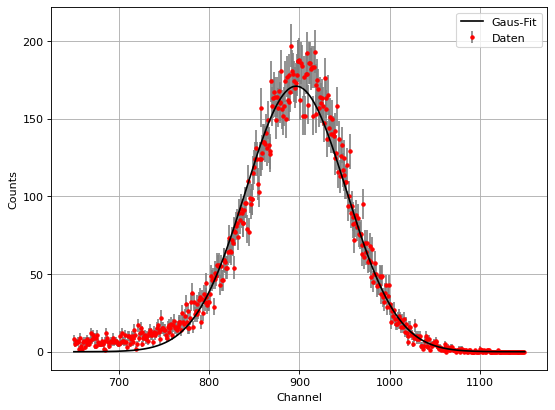

#########################################################125_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 250
    # variables        = 3
    chi-square         = 427.831654
    reduced chi-square = 1.73211196
    Akaike info crit   = 140.317217
    Bayesian info crit = 150.881600
[[Variables]]
    amplitude:  28337.4922 +/- 320.208617 (1.13%) (init = 1)
    center:     200.877052 +/- 0.82943430 (0.41%) (init = 200)
    sigma:      51.6838052 +/- 0.58560749 (1.13%) (init = 1)
    fwhm:       121.706058 +/- 1.37900023 (1.13%) == '2.3548200*sigma'
    height:     218.734365 +/- 2.22816989 (1.02%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.741
    C(amplitude, center) = -0.626
    C(amplitude, sigma)  = 0.595


<Figure size 432x288 with 0 Axes>

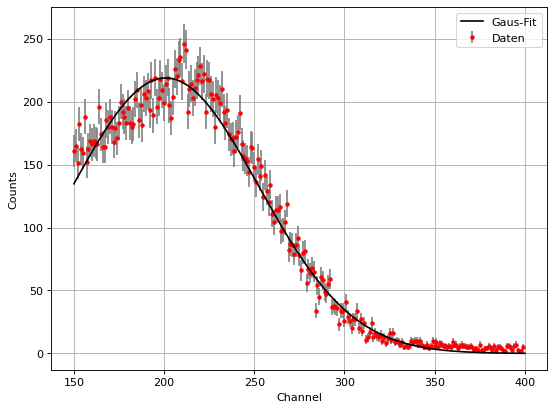

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 500
    # variables        = 3
    chi-square         = 1292.46111
    reduced chi-square = 2.60052537
    Akaike info crit   = 480.847709
    Bayesian info crit = 493.491534
[[Variables]]
    amplitude:  23754.2819 +/- 248.606578 (1.05%) (init = 1)
    center:     658.436714 +/- 0.52601088 (0.08%) (init = 700)
    sigma:      49.6627801 +/- 0.39306754 (0.79%) (init = 1)
    fwhm:       116.946908 +/- 0.92560330 (0.79%) == '2.3548200*sigma'
    height:     190.818714 +/- 2.49928500 (1.31%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.136


<Figure size 432x288 with 0 Axes>

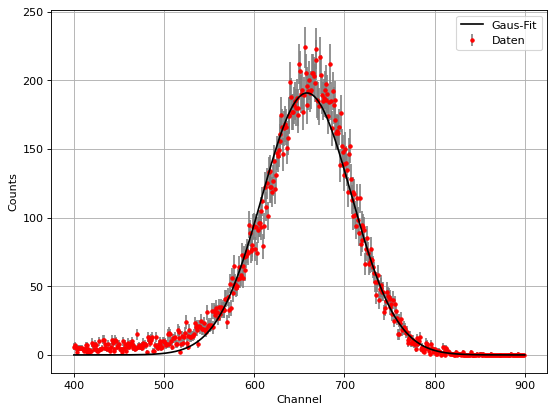

#########################################################150_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 210
    # variables        = 3
    chi-square         = 211.534930
    reduced chi-square = 1.02190788
    Akaike info crit   = 7.52934786
    Bayesian info crit = 17.5706705
[[Variables]]
    amplitude:  26376.4736 +/- 297.716479 (1.13%) (init = 1)
    center:     232.473123 +/- 0.88216514 (0.38%) (init = 225)
    sigma:      55.2493347 +/- 0.58761581 (1.06%) (init = 1)
    fwhm:       130.102238 +/- 1.38372946 (1.06%) == '2.3548200*sigma'
    height:     190.458240 +/- 1.57832775 (0.83%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.804
    C(amplitude, center) = -0.762
    C(amplitude, sigma)  = 0.716


<Figure size 432x288 with 0 Axes>

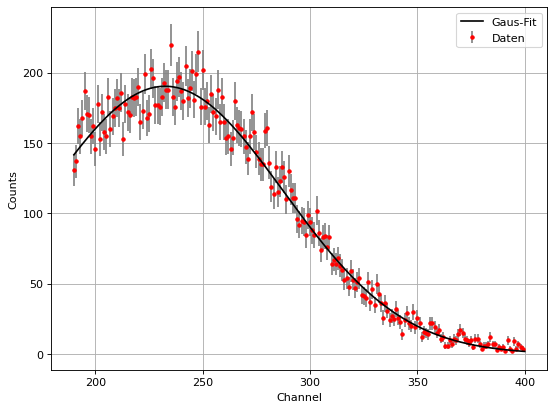

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 400
    # variables        = 3
    chi-square         = 1036.99147
    reduced chi-square = 2.61206918
    Akaike info crit   = 387.045773
    Bayesian info crit = 399.020166
[[Variables]]
    amplitude:  24003.6425 +/- 250.999282 (1.05%) (init = 1)
    center:     750.537189 +/- 0.59821068 (0.08%) (init = 750)
    sigma:      56.2044575 +/- 0.47241436 (0.84%) (init = 1)
    fwhm:       132.351381 +/- 1.11245079 (0.84%) == '2.3548200*sigma'
    height:     170.379161 +/- 2.25800682 (1.33%) == '0.3989423*amplitude/max(1e-15, sigma)'


<Figure size 432x288 with 0 Axes>

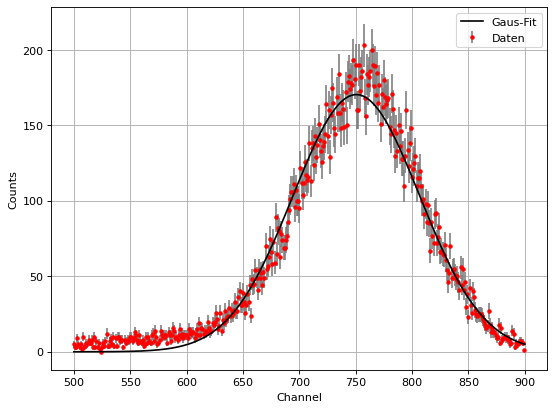

#########################################################175_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 275
    # variables        = 3
    chi-square         = 633.799922
    reduced chi-square = 2.33014677
    Akaike info crit   = 235.614612
    Bayesian info crit = 246.464925
[[Variables]]
    amplitude:  28439.0656 +/- 341.377088 (1.20%) (init = 1)
    center:     80.8101649 +/- 0.85837510 (1.06%) (init = 100)
    sigma:      51.0672045 +/- 0.62439487 (1.22%) (init = 1)
    fwhm:       120.254075 +/- 1.47033754 (1.22%) == '2.3548200*sigma'
    height:     222.168931 +/- 2.61320997 (1.18%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.701
    C(amplitude, center) = -0.550
    C(amplitude, sigma)  = 0.529


<Figure size 432x288 with 0 Axes>

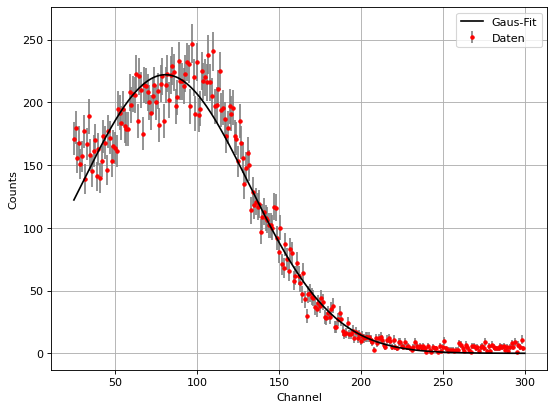

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 450
    # variables        = 3
    chi-square         = 1238.46753
    reduced chi-square = 2.77062087
    Akaike info crit   = 461.572101
    Bayesian info crit = 473.899844
[[Variables]]
    amplitude:  23544.2950 +/- 255.501145 (1.09%) (init = 1)
    center:     531.945137 +/- 0.52488573 (0.10%) (init = 550)
    sigma:      47.7751420 +/- 0.39620454 (0.83%) (init = 1)
    fwhm:       112.501860 +/- 0.93299039 (0.83%) == '2.3548200*sigma'
    height:     196.604653 +/- 2.67866874 (1.36%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.132


<Figure size 432x288 with 0 Axes>

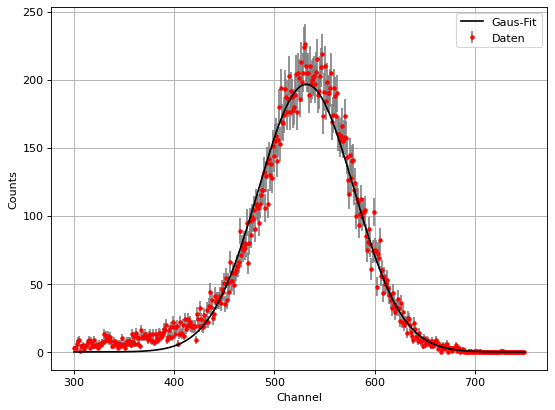

#########################################################200_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 280
    # variables        = 3
    chi-square         = 453.302368
    reduced chi-square = 1.63647064
    Akaike info crit   = 140.895538
    Bayesian info crit = 151.799907
[[Variables]]
    amplitude:  28696.5701 +/- 283.883599 (0.99%) (init = 1)
    center:     86.8914071 +/- 0.82878029 (0.95%) (init = 100)
    sigma:      60.0186618 +/- 0.60553241 (1.01%) (init = 1)
    fwhm:       141.333145 +/- 1.42591982 (1.01%) == '2.3548200*sigma'
    height:     190.745267 +/- 1.86914904 (0.98%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.693
    C(amplitude, center) = -0.536
    C(amplitude, sigma)  = 0.519


<Figure size 432x288 with 0 Axes>

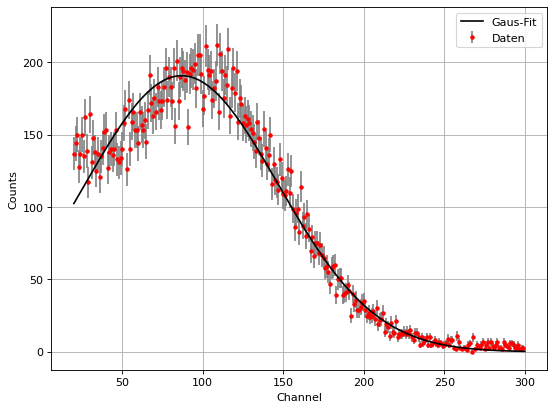

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 500
    # variables        = 3
    chi-square         = 1520.00561
    reduced chi-square = 3.05836140
    Akaike info crit   = 561.930604
    Bayesian info crit = 574.574429
[[Variables]]
    amplitude:  23439.9934 +/- 267.811262 (1.14%) (init = 1)
    center:     612.241095 +/- 0.62555128 (0.10%) (init = 600)
    sigma:      54.0419513 +/- 0.47141418 (0.87%) (init = 1)
    fwhm:       127.259068 +/- 1.11009555 (0.87%) == '2.3548200*sigma'
    height:     173.036033 +/- 2.48275223 (1.43%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.143


<Figure size 432x288 with 0 Axes>

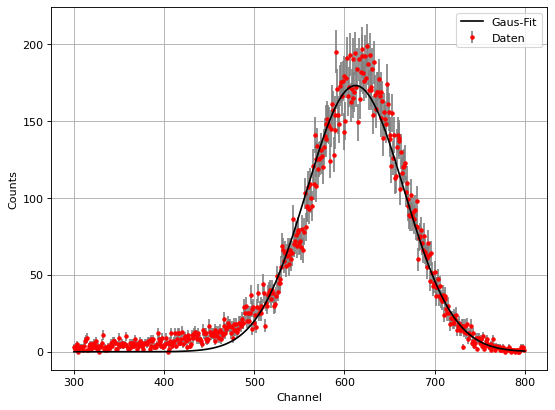

#########################################################225_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 400
    # variables        = 3
    chi-square         = 1132.83901
    reduced chi-square = 2.85349876
    Akaike info crit   = 422.407044
    Bayesian info crit = 434.381438
[[Variables]]
    amplitude:  24107.3325 +/- 262.347411 (1.09%) (init = 1)
    center:     413.967592 +/- 0.51399568 (0.12%) (init = 400)
    sigma:      46.6594610 +/- 0.38308918 (0.82%) (init = 1)
    fwhm:       109.874632 +/- 0.90210607 (0.82%) == '2.3548200*sigma'
    height:     206.119712 +/- 2.80483570 (1.36%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.138


<Figure size 432x288 with 0 Axes>

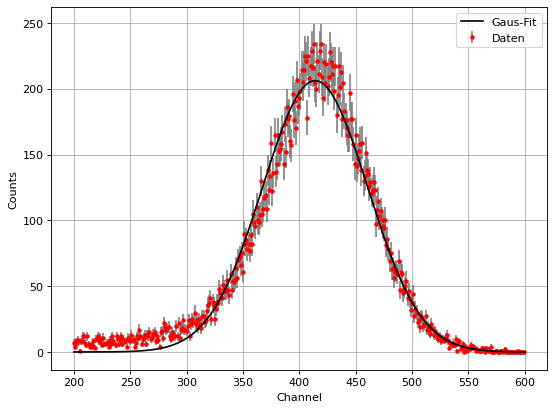

#########################################################250_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 400
    # variables        = 3
    chi-square         = 1035.13535
    reduced chi-square = 2.60739383
    Akaike info crit   = 386.329169
    Bayesian info crit = 398.303563
[[Variables]]
    amplitude:  23685.6926 +/- 248.621042 (1.05%) (init = 1)
    center:     464.117534 +/- 0.56602296 (0.12%) (init = 400)
    sigma:      53.1545090 +/- 0.42367576 (0.80%) (init = 1)
    fwhm:       125.169301 +/- 0.99768016 (0.80%) == '2.3548200*sigma'
    height:     177.769015 +/- 2.33606508 (1.31%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.141


<Figure size 432x288 with 0 Axes>

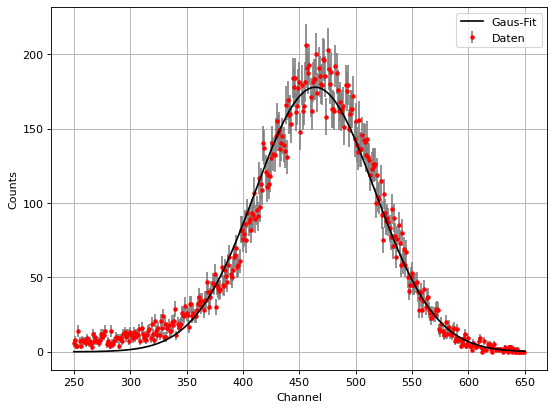

#########################################################275_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 350
    # variables        = 3
    chi-square         = 1128.22158
    reduced chi-square = 3.25135901
    Akaike info crit   = 415.662642
    Bayesian info crit = 427.236442
[[Variables]]
    amplitude:  23794.9502 +/- 278.310300 (1.17%) (init = 1)
    center:     298.380421 +/- 0.54567846 (0.18%) (init = 300)
    sigma:      46.0166142 +/- 0.41328597 (0.90%) (init = 1)
    fwhm:       108.360844 +/- 0.97321407 (0.90%) == '2.3548200*sigma'
    height:     206.290974 +/- 3.03083030 (1.47%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.130


<Figure size 432x288 with 0 Axes>

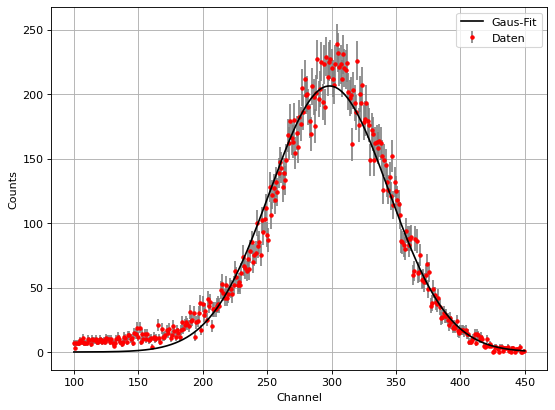

#########################################################300_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 450
    # variables        = 3
    chi-square         = 1197.26869
    reduced chi-square = 2.67845345
    Akaike info crit   = 446.347755
    Bayesian info crit = 458.675498
[[Variables]]
    amplitude:  23648.8653 +/- 251.757690 (1.06%) (init = 1)
    center:     332.853783 +/- 0.57026089 (0.17%) (init = 320)
    sigma:      52.8703571 +/- 0.43118203 (0.82%) (init = 1)
    fwhm:       124.500174 +/- 1.01535606 (0.82%) == '2.3548200*sigma'
    height:     178.446548 +/- 2.38761431 (1.34%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.140


<Figure size 432x288 with 0 Axes>

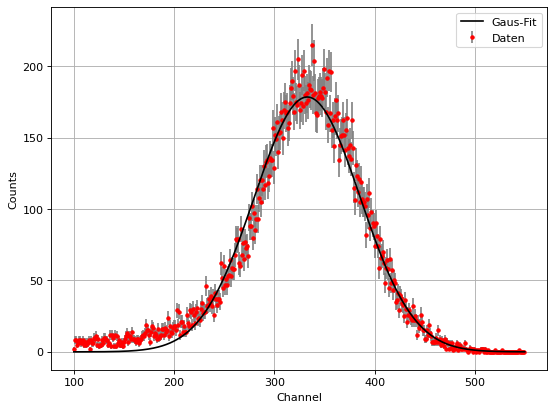

#########################################################325_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 300
    # variables        = 3
    chi-square         = 605.421321
    reduced chi-square = 2.03845563
    Akaike info crit   = 216.642642
    Bayesian info crit = 227.753989
[[Variables]]
    amplitude:  24012.5584 +/- 221.410995 (0.92%) (init = 1)
    center:     190.029961 +/- 0.42640600 (0.22%) (init = 200)
    sigma:      45.5180190 +/- 0.32212365 (0.71%) (init = 1)
    fwhm:       107.186741 +/- 0.75854321 (0.71%) == '2.3548200*sigma'
    height:     210.457869 +/- 2.43231830 (1.16%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.129


<Figure size 432x288 with 0 Axes>

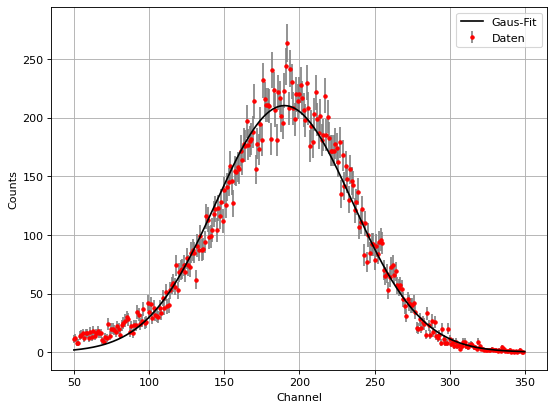

#########################################################350_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 300
    # variables        = 3
    chi-square         = 579.560091
    reduced chi-square = 1.95138078
    Akaike info crit   = 203.546063
    Bayesian info crit = 214.657410
[[Variables]]
    amplitude:  23919.3137 +/- 216.699956 (0.91%) (init = 1)
    center:     203.801498 +/- 0.49380259 (0.24%) (init = 200)
    sigma:      53.0719475 +/- 0.39336163 (0.74%) (init = 1)
    fwhm:       124.974884 +/- 0.92629582 (0.74%) == '2.3548200*sigma'
    height:     179.801693 +/- 2.06890571 (1.15%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.105


<Figure size 432x288 with 0 Axes>

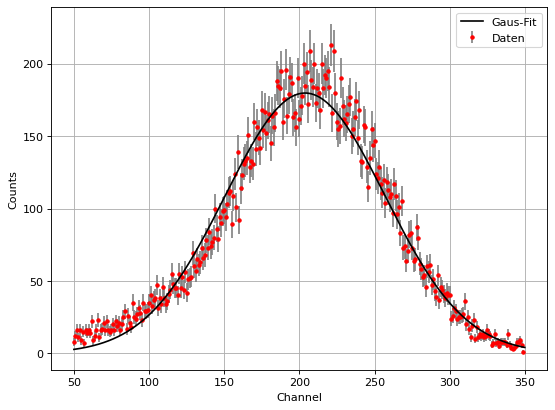

#########################################################375_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 250
    # variables        = 3
    chi-square         = 223.295061
    reduced chi-square = 0.90402859
    Akaike info crit   = -22.2417194
    Bayesian info crit = -11.6773366
[[Variables]]
    amplitude:  23485.4609 +/- 150.498058 (0.64%) (init = 1)
    center:     80.9040411 +/- 0.32048645 (0.40%) (init = 75)
    sigma:      44.1036762 +/- 0.25407276 (0.58%) (init = 1)
    fwhm:       103.856219 +/- 0.59829561 (0.58%) == '2.3548200*sigma'
    height:     212.439067 +/- 1.68176995 (0.79%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.339
    C(amplitude, sigma)  = 0.157
    C(amplitude, center) = -0.127


<Figure size 432x288 with 0 Axes>

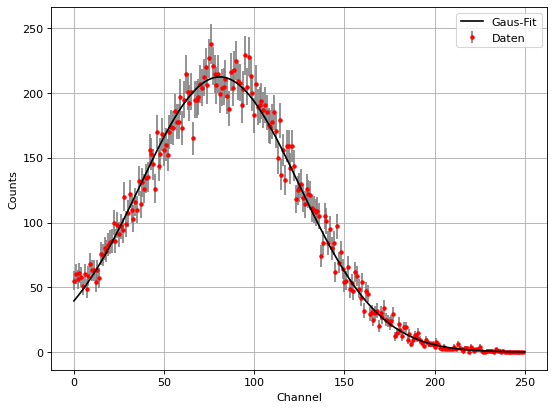

#########################################################400_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 250
    # variables        = 3
    chi-square         = 310.103545
    reduced chi-square = 1.25547994
    Akaike info crit   = 59.8613353
    Bayesian info crit = 70.4257181
[[Variables]]
    amplitude:  23164.4533 +/- 184.330856 (0.80%) (init = 1)
    center:     76.1990113 +/- 0.47816750 (0.63%) (init = 75)
    sigma:      49.3917671 +/- 0.37923571 (0.77%) (init = 1)
    fwhm:       116.308721 +/- 0.89303182 (0.77%) == '2.3548200*sigma'
    height:     187.101633 +/- 1.77344396 (0.95%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.462
    C(amplitude, sigma)  = 0.265
    C(amplitude, center) = -0.243


<Figure size 432x288 with 0 Axes>

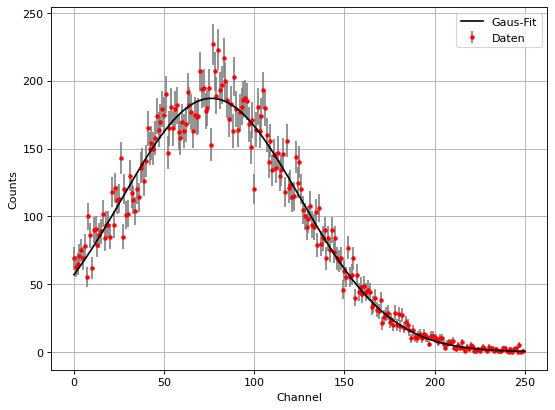

<Figure size 432x288 with 0 Axes>

In [4]:
for i in data:

    if i[0] == '055_Torr':

        print("#########################################################"+str(i[0]))

        res = f.gaus3fit(i,0,750,200,150,250,350,300,400,520,450,600)
        torr55_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])
        plt.savefig("Results/55Torr3.pdf")
        nf.write(f.gausfit_table(torr55_3))

        res = f.gaus1fit(i,750,1300,1100,900,1200)
        torr55_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/55Torr1.pdf")
        nf.write(f.gausfit_table(torr55_1))



        amp1,amp2,amp3,amp4 = torr55_3.out.params["g1_amplitude"].value,torr55_3.out.params["g2_amplitude"].value,torr55_3.out.params["g3_amplitude"].value, torr55_1.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = torr55_3.out.params["g1_amplitude"].stderr,torr55_3.out.params["g2_amplitude"].stderr,torr55_3.out.params["g3_amplitude"].stderr,torr55_1.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = torr55_3.out.params["g1_center"].value,torr55_3.out.params["g2_center"].value,torr55_3.out.params["g3_center"].value,torr55_1.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = torr55_3.out.params["g1_sigma"].value,torr55_3.out.params["g2_sigma"].value,torr55_3.out.params["g3_sigma"].value,torr55_1.out.params["sigma"].value
        
        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

    
    if i[0] == '075_Torr':

        print("#########################################################"+str(i[0]))


        res = f.gaus3fit(i,0,500,75,0,150,200,175,250,350,300,400)
        torr75_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])
        plt.savefig("Results/75Torr3.pdf")
        nf.write(f.gausfit_table(torr75_3))

        res = f.gaus1fit(i,650,1000,1100,900,1200)
        torr75_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/75Torr1.pdf")
        nf.write(f.gausfit_table(torr75_1))

        amp1,amp2,amp3,amp4 = torr75_3.out.params["g1_amplitude"].value,torr75_3.out.params["g2_amplitude"].value,torr75_3.out.params["g3_amplitude"].value, torr75_1.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = torr75_3.out.params["g1_amplitude"].stderr,torr75_3.out.params["g2_amplitude"].stderr,torr75_3.out.params["g3_amplitude"].stderr,torr75_1.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = torr75_3.out.params["g1_center"].value,torr75_3.out.params["g2_center"].value,torr75_3.out.params["g3_center"].value,torr75_1.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = torr75_3.out.params["g1_sigma"].value,torr75_3.out.params["g2_sigma"].value,torr75_3.out.params["g3_sigma"].value,torr75_1.out.params["sigma"].value
        
        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "100_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus3fit(i,0,600,75,0,150,200,175,250,350,300,400)
        torr100_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])
        plt.savefig("Results/100Torr3.pdf")
        nf.write(f.gausfit_table(torr100_3))

        res = f.gaus1fit(i,650,1150,900,800,1000)
        torr100_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/100Torr1.pdf")
        nf.write(f.gausfit_table(torr100_1))

        amp1,amp2,amp3,amp4 = torr100_3.out.params["g1_amplitude"].value,torr100_3.out.params["g2_amplitude"].value,torr100_3.out.params["g3_amplitude"].value, torr100_1.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = torr100_3.out.params["g1_amplitude"].stderr,torr100_3.out.params["g2_amplitude"].stderr,torr100_3.out.params["g3_amplitude"].stderr,torr100_1.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = torr100_3.out.params["g1_center"].value,torr100_3.out.params["g2_center"].value,torr100_3.out.params["g3_center"].value,torr100_1.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = torr100_3.out.params["g1_sigma"].value,torr100_3.out.params["g2_sigma"].value,torr100_3.out.params["g3_sigma"].value,torr100_1.out.params["sigma"].value
        
        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

    if i[0] == "125_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,150,400,200,150,250,override=True)
        torr125_11 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/125Torr1.pdf")
        nf.write(f.gausfit_table(torr125_11))

        res = f.gaus1fit(i,400,900,700,600,800,override=True)
        torr125_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/125Torr1.pdf")
        nf.write(f.gausfit_table(torr125_12))

        amp1,amp2,amp3,amp4 = 'none','none',torr125_11.out.params["amplitude"].value, torr125_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none',torr125_11.out.params["amplitude"].stderr,torr125_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none',torr125_11.out.params["center"].value,torr125_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none',torr125_11.out.params["sigma"].value,torr125_12.out.params["sigma"].value
        
        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

    if i[0] == "150_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,190,400,225,200,250,override=True)
        torr150_11 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/150Torr1.pdf")
        nf.write(f.gausfit_table(torr150_11))

        res = f.gaus1fit(i,500,900,750,700,800,override=True)
        torr150_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/150Torr1.pdf")
        nf.write(f.gausfit_table(torr150_12))

        amp1,amp2,amp3,amp4 = 'none','none',torr150_11.out.params["amplitude"].value, torr150_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none',torr150_11.out.params["amplitude"].stderr,torr150_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none',torr150_11.out.params["center"].value,torr150_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none',torr150_11.out.params["sigma"].value,torr150_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")



    if i[0] == "175_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,25,300,100,50,150,override=True)
        torr175_11 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/175Torr1.pdf")
        nf.write(f.gausfit_table(torr175_11))

        res = f.gaus1fit(i,300,750,550,500,600,override=True)
        torr175_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/175Torr1.pdf")
        nf.write(f.gausfit_table(torr175_12))

        amp1,amp2,amp3,amp4 = 'none','none',torr175_11.out.params["amplitude"].value, torr175_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none',torr175_11.out.params["amplitude"].stderr,torr175_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none',torr175_11.out.params["center"].value,torr175_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none',torr175_11.out.params["sigma"].value,torr175_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")



    if i[0] == "200_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,20,300,100,50,150,override=True)
        torr200_11 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/200Torr1.pdf")
        nf.write(f.gausfit_table(torr200_11))

        res = f.gaus1fit(i,300,800,600,550,650,override=True)
        torr200_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/200Torr1.pdf")
        nf.write(f.gausfit_table(torr200_12))

        amp1,amp2,amp3,amp4 = 'none','none',torr200_11.out.params["amplitude"].value, torr200_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none',torr200_11.out.params["amplitude"].stderr,torr200_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none',torr200_11.out.params["center"].value,torr200_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none',torr200_11.out.params["sigma"].value,torr200_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "225_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,200,600,400,350,550,override=True)
        torr225_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/225Torr12.pdf")
        nf.write(f.gausfit_table(torr225_12))

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr225_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr225_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr225_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr225_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

    if i[0] == "250_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,250,650,400,350,550,override=True)
        torr250_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/250Torr12.pdf")
        nf.write(f.gausfit_table(torr250_12))

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr250_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr250_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr250_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr250_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0]== "275_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,100,450,300,250,350,override=True)
        torr275_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/275Torr12.pdf")
        nf.write(f.gausfit_table(torr275_12))

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr275_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr275_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr275_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr275_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "300_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,100,550,320,270,370,override=True)
        torr300_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/300Torr12.pdf")
        nf.write(f.gausfit_table(torr300_12))

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr300_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr300_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr300_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr300_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "325_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,50,350,200,150,250,override=True)
        torr325_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/325Torr12.pdf")
        nf.write(f.gausfit_table(torr325_12))

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr325_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr325_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr325_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr325_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "350_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,50,350,200,150,250,override=True)
        torr350_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/350Torr12.pdf")
        nf.write(f.gausfit_table(torr350_12))

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr350_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr350_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr350_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr350_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "375_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,0,250,75,25,125,override=True)
        torr375_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/375Torr12.pdf")
        nf.write(f.gausfit_table(torr375_12))

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr375_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr375_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr375_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr375_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "400_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,0,250,75,25,125,override=True)
        torr400_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/400Torr12.pdf")
        nf.write(f.gausfit_table(torr400_12))

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr400_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr400_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr400_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr400_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

nf.close()
countrate.close()
center.close()